<a href="https://colab.research.google.com/github/steffiangel/Large-Language-Model-Projects/blob/main/LLM_Lab8_2348510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **English to French Translation and Image Caption Generation**

# English to French translation

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import MarianTokenizer, TFMarianMTModel

In [ ]:

df = pd.read_csv("/content/eng_-french.csv")

In [ ]:

input = tokenizer(df['English words/sentences'].tolist(), truncation=True, padding=True, max_length=128)
target = tokenizer(df['French words/sentences'].tolist(), truncation=True, padding=True, max_length=128)

In [ ]:
input_ids = tf.convert_to_tensor(input['input_ids'])
attention_masks = tf.convert_to_tensor(input['attention_mask'])
decoder_input_ids = tf.convert_to_tensor(target['input_ids'])

labels = tf.roll(decoder_input_ids, shift=-1, axis=1)
labels = tf.where(labels == 0, -100, labels)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(({
    'input_ids': input_ids,
    'attention_mask': attention_masks,
    'decoder_input_ids': decoder_input_ids
}, labels))
dataset = dataset.take(500).shuffle(250).batch(12)

In [ ]:
def masked_loss(y_true, y_pred):
    mask = tf.not_equal(y_true, -100)  # Create a mask to filter out -100 labels
    y_true = tf.boolean_mask(y_true, mask)  # Apply the mask to y_true
    y_pred = tf.boolean_mask(y_pred, mask)  # Apply the mask to y_pred

    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=masked_loss)
model.fit(dataset, epochs=1)

42/42 [==============================] - 893s 20s/step - loss: 0.6855


In [ ]:
text ="Effective communication is crucial"
input_ids = tokenizer.encode(text, return_tensors="tf")
generated_ids = model.generate(input_ids, max_length=128, num_beams=4, early_stopping=True)
translated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print("Translated French text: ", translated_text)


Translated French text:  une communication efficace est essentielle


# Image Caption Generation

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer
from PIL import Image
import requests

model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

tokenizer.pad_token = tokenizer.eos_token
# Function to process image input
def process_image(image_path):
    image = Image.open(image_path)
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    return pixel_values

# Function to process text input
def process_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    return inputs



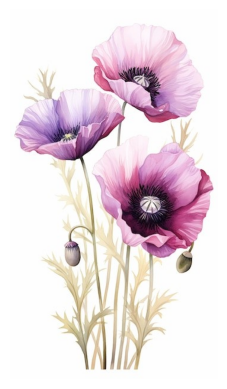

Generated caption: a vase filled with flowers on top of a table 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = "pop.jpg"
text = "flower is so pretty"

def display_image(image_path):
    img = mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

image_inputs = process_image(image_path)
text_inputs = process_text(text)

outputs = model.generate(image_inputs, max_length=50, num_beams=5, early_stopping=True)
generated_caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
display_image(image_path)
print(f"Generated caption: {generated_caption}")

